In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from gm_utils import visualize_density, sample, geodesic, energy

In [2]:
# If latex is installed - for nicer formulas rendering in plots
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

Energy of pf ode trajectory: 0.14768564701080322 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:06<00:00, 286.09it/s]


Energy of a geodesic: 0.09895339608192444
Energy of pf ode trajectory: 0.1404285430908203 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:07<00:00, 282.25it/s]


Energy of a geodesic: 0.08639109879732132
Energy of pf ode trajectory: 0.15019121766090393 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:06<00:00, 289.17it/s]

Energy of a geodesic: 0.10196735709905624


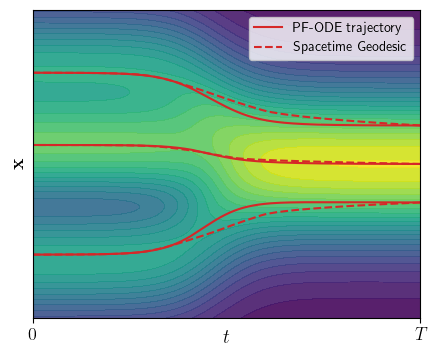

In [3]:
fig, ax = plt.subplots(figsize=(5, 4))
t_min = 0.1
visualize_density(ax)
for i, x in enumerate(torch.tensor([[1.], [0.], [-1.]])):
    pf_ode_sample = sample(x, 512, t_start=1., t_end=t_min)
    pf_ode_theta = torch.from_numpy(np.concatenate(pf_ode_sample, axis=1))
    print('Energy of pf ode trajectory:', energy(pf_ode_theta).item(), end=' ')
    theta1 = pf_ode_theta[0]
    theta2 = pf_ode_theta[-1]
    shortest_path12 = geodesic(theta1, theta2, n_opt_steps=2000, num_intermediate_points=512, num_nodes=10)
    print('Energy of a geodesic:', energy(torch.from_numpy(shortest_path12)).item())
    if i == 0:
        label_pf = 'PF-ODE trajectory'
        label_g = 'Spacetime Geodesic'
    else:
        label_pf = None
        label_g = None
    ax.plot(pf_ode_theta[:, 0], pf_ode_theta[:, 1], color='C3', label=label_pf)
    ax.plot(shortest_path12[:, 0], shortest_path12[:, 1], color='C3', linestyle='--', label=label_g)
ax.set_xlim((t_min, 1))
ax.set_xticks([t_min, 1], [r'$0$', r'$T$'], fontsize=13)
ax.set_yticks([])
ax.set_xlabel(r'$t$', fontsize=14, labelpad=-10)
ax.set_ylabel(r'$\mathbf{x}$', fontsize=14)
ax.legend()
# plt.savefig('gaussian_mixture_pf_ode_geodesic.png', bbox_inches='tight', dpi=300)